In [1348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder 

### Helpful functions

In [1349]:
def remove_column(dataset,col:str):
    dataset.drop(columns=[col],inplace=True)
    
    return dataset

def replace_with_mode(dataset,column:str):
    dataset.loc[dataset[column].isna(),[column]]=dataset[column].mode()[0]
    return dataset

def replace_with_mean(dataset,column:str):
    dataset.loc[dataset[column].isna(),[column]]=dataset[column].mean()
    return dataset
    

def replace_over_3_zscore(dataset,column):
    z_score = (dataset[column] - dataset[column].mean())/dataset[column].std()
    
    to_remove = abs(z_score) >3 
    
    index_list = list(to_remove[to_remove ==True].index)
    index_list
    print(index_list)
    dataset.iloc[index_list][column] = dataset[column].mean()
    #dataset.drop(index_list,inplace=True)
    
    
    return dataset

In [1350]:
train_data = pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1351]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data cleaning

In [1352]:
train_data =remove_column(train_data,"PassengerId")
train_data =remove_column(train_data,"Name")
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [1353]:
test_data =remove_column(test_data,"PassengerId")
test_data =remove_column(test_data,"Name")
test_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,male,NaN,0,0,359309,8.0500,NaN,S


In [1354]:
train_data.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [1355]:
test_data.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### Cabin

In [1356]:
train_data = remove_column(train_data,"Cabin")

In [1357]:
test_data = remove_column(test_data,"Cabin")

### Ticket

In [1358]:
len(train_data["Ticket"].unique())


681

In [1359]:
train_data = remove_column(train_data,"Ticket")

In [1360]:
len(test_data["Ticket"].unique())

363

In [1361]:
test_data = remove_column(test_data,"Ticket")

### Age

In [1362]:
train_data = replace_with_mean(train_data,"Age")

In [1363]:
test_data = replace_with_mean(test_data,"Age")

In [1364]:
train_data = replace_over_3_zscore(train_data,"Age")


[96, 116, 493, 630, 672, 745, 851]


C:\Users\alekw\AppData\Local\Temp\ipykernel_50556\663319400.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.iloc[index_list][column] = dataset[column].mean()


In [1365]:
test_data = replace_over_3_zscore(test_data,"Age")

[96]


C:\Users\alekw\AppData\Local\Temp\ipykernel_50556\663319400.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.iloc[index_list][column] = dataset[column].mean()


### Embarked

In [1366]:
train_data["Embarked"].dropna(inplace=True)

In [1367]:
import numpy as np
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1368]:
test_data["Embarked"].isna().sum()

0

### Fare

In [1369]:
train_data = replace_over_3_zscore(train_data,"Fare")

[27, 88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679, 689, 700, 716, 730, 737, 742, 779]


C:\Users\alekw\AppData\Local\Temp\ipykernel_50556\663319400.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.iloc[index_list][column] = dataset[column].mean()


In [1370]:
test_data = replace_over_3_zscore(test_data,"Fare")

[24, 53, 59, 64, 69, 74, 75, 81, 114, 142, 156, 184, 202, 218, 324, 343, 375, 407]


C:\Users\alekw\AppData\Local\Temp\ipykernel_50556\663319400.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.iloc[index_list][column] = dataset[column].mean()


In [1371]:
test_data.dropna(inplace=True)

### Sex

In [1372]:
train_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [1373]:
test_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [1374]:
train_data[(train_data["Sex"] != "male")& (train_data["Sex"] != "female")]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


## One Hot Encoding

In [1375]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [1376]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [1377]:
categorical_columns=["Embarked","Sex"]

In [1378]:
train_data["Embarked"] = train_data["Embarked"].astype(str)
test_data["Embarked"] = test_data["Embarked"].astype(str)

train_data["Sex"] = train_data["Sex"].astype(str)
test_data["Sex"] = test_data["Sex"].astype(str)

In [1379]:
train_data.Embarked.value_counts()

Embarked
S      644
C      168
Q       77
nan      2
Name: count, dtype: int64

In [1380]:

train_data.reset_index(inplace=True)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(train_data[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))

train_data=pd.concat([train_data.drop(categorical_columns,axis=1),one_hot_df],axis=1)

train_data.drop(columns="index",inplace=True)

In [1381]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0
4,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0


In [1382]:
test_data.reset_index(inplace=True)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(test_data[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))

test_data=pd.concat([test_data.drop(categorical_columns,axis=1),one_hot_df],axis=1)

test_data.drop(columns="index",inplace=True)

## Correlation analysis

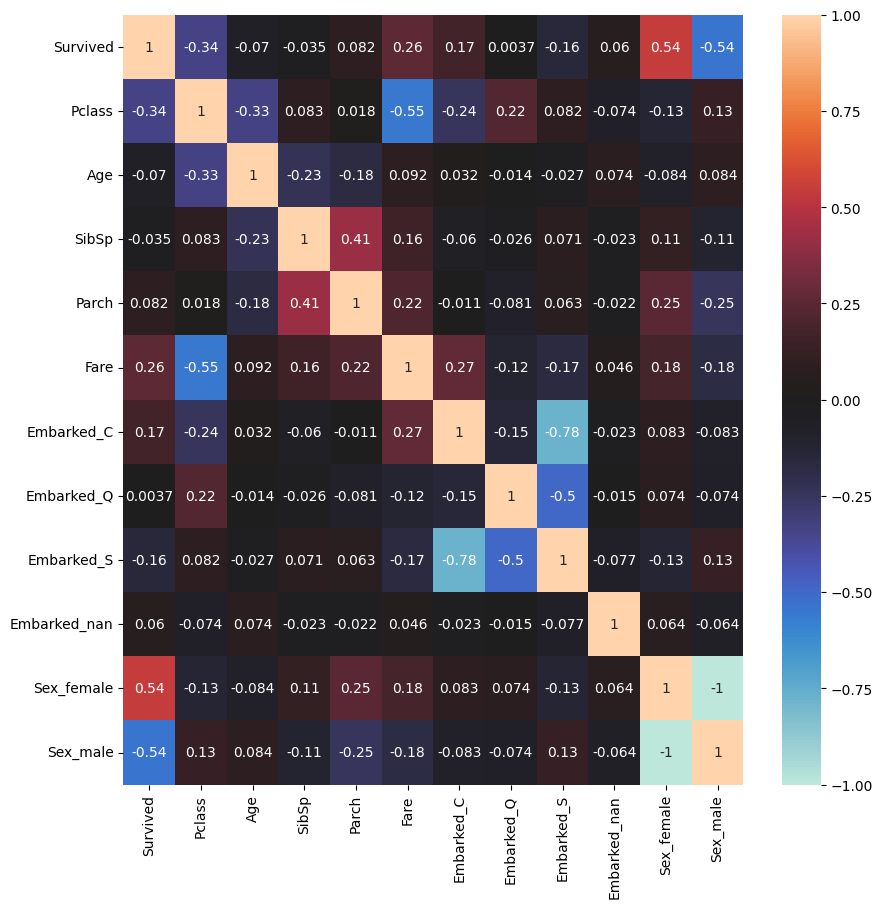

In [1383]:
fig, ax = plt.subplots(figsize=(10,10))
#sns.heatmap(df_sklearn_encoded.drop(columns=["y"]).corr(), center=0.0,ax=ax,vmax=1,vmin=-1)
df_corr=train_data.copy()

heatmap = sns.heatmap(df_corr.corr(), center=0.0,ax=ax,vmax=1,vmin=-1,annot=True)


In [1384]:
train_data.drop(columns=["Embarked_S","Sex_female","Embarked_nan"],inplace=True)
test_data.drop(columns=["Embarked_S","Sex_female"],inplace=True)

## TRAINING

In [1385]:
X_train = train_data.drop(columns="Survived")
y_train = train_data.Survived

In [1386]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Sex_male
0,3,22.000000,1,0,7.2500,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0,0.0
2,3,26.000000,0,0,7.9250,0.0,0.0,0.0
3,1,35.000000,1,0,53.1000,0.0,0.0,0.0
4,3,35.000000,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0.0,0.0,1.0
887,1,19.000000,0,0,30.0000,0.0,0.0,0.0
888,3,29.699118,1,2,23.4500,0.0,0.0,0.0
889,1,26.000000,0,0,30.0000,1.0,0.0,1.0


In [1387]:
test_data

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Sex_male
0,3,34.50000,0,0,7.8292,0.0,1.0,1.0
1,3,47.00000,1,0,7.0000,0.0,0.0,0.0
2,2,62.00000,0,0,9.6875,0.0,1.0,1.0
3,3,27.00000,0,0,8.6625,0.0,0.0,1.0
4,3,22.00000,1,1,12.2875,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
412,3,30.27259,0,0,8.0500,0.0,0.0,1.0
413,1,39.00000,0,0,108.9000,1.0,0.0,0.0
414,3,38.50000,0,0,7.2500,0.0,0.0,1.0
415,3,30.27259,0,0,8.0500,0.0,0.0,1.0


In [1388]:
test_data.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Sex_male      0
dtype: int64

In [1389]:
predictions = test_data.copy(deep=True)

predictions.drop(columns=predictions.columns.values,inplace=True)

predictions

""
0
1
2
3
4
...
412
413
414
415


### Logistic regression

In [1390]:
logistic_regression_model = LogisticRegression().fit(X_train,y_train)

y_pred  = logistic_regression_model.predict(X_train)

print(classification_report(y_train,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



c:\Users\alekw\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1391]:
y_pred = logistic_regression_model.predict(test_data)
predictions["LogisticRegression"] = y_pred
predictions

,LogisticRegression
0,0
1,0
2,0
3,0
4,1
...,...
412,0
413,1
414,0
415,0


## KNN

In [1392]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

y_pred  = knn_model.predict(X_train)

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.69      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.81      0.81      0.80       891



In [1393]:
y_pred = knn_model.predict(test_data)
predictions["KNN"] = y_pred
predictions

,LogisticRegression,KNN
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0
...,...,...
412,0,0
413,1,1
414,0,0
415,0,0


### Naive Bayes

In [1394]:
nb_model = GaussianNB().fit(X_train,y_train)
y_pred  = nb_model.predict(X_train)

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.73      0.73      0.73       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [1395]:
y_pred = nb_model.predict(test_data)
predictions["NaiveBayes"] = y_pred
predictions

,LogisticRegression,KNN,NaiveBayes
0,0,0,0
1,0,0,1
2,0,0,0
3,0,1,0
4,1,0,1
...,...,...,...
412,0,0,0
413,1,1,1
414,0,0,0
415,0,0,0


### Decision Tree

In [1396]:
tree_model = DecisionTreeClassifier().fit(X_train,y_train)
y_pred  = tree_model.predict(X_train)

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [1397]:
y_pred = tree_model.predict(test_data)
predictions["DecisionTree"] = y_pred
predictions

,LogisticRegression,KNN,NaiveBayes,DecisionTree
0,0,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,1
4,1,0,1,1
...,...,...,...,...
412,0,0,0,0
413,1,1,1,1
414,0,0,0,0
415,0,0,0,0


### SVM

In [1398]:
svm_model = SVC().fit(X_train,y_train)
y_pred  = svm_model.predict(X_train)

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       549
           1       0.69      0.31      0.43       342

    accuracy                           0.68       891
   macro avg       0.69      0.61      0.60       891
weighted avg       0.69      0.68      0.65       891



In [1399]:
y_pred = svm_model.predict(test_data)
predictions["SVM"] = y_pred
predictions

,LogisticRegression,KNN,NaiveBayes,DecisionTree,SVM
0,0,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,1,0,1,0
4,1,0,1,1,0
...,...,...,...,...,...
412,0,0,0,0,0
413,1,1,1,1,1
414,0,0,0,0,0
415,0,0,0,0,0


### Save model

In [1402]:
import pickle 
with open('titanic_survival_model.pkl','wb') as f:
    pickle.dump(tree_model,f)
    

### Save training scores

In [1405]:
predictions.to_csv("predicted_values",sep=";",index=None)